<a href="https://colab.research.google.com/github/seongyeon1/test1/blob/main/sentiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <strong>About Practice Problem: Identify the Sentiments</strong>

  Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material, and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations. Brands can use this data to measure the success of their products in an objective manner. In this challenge, you are provided with tweet data to predict sentiment on electronic products of netizens.

## <strong>Data Science Resources</strong>
- Get started with NLP and text classification with our latest offering ‘Natural Language Processing (NLP) using Python’ course
- Refer this comprehensive guide that exhaustively covers text classification techniques using different libraries and its implementation in python.
- You can also refer this guide that covers multiple techniques including TF-IDF, Word2Vec etc. to tackle problems related to Sentiment Analysis.

## <strong>Rules</strong>
- One person cannot participate with more than one user accounts.
- This is proprietary dataset, you can only use for this hackathon (Analytics Vidhya Datahack Platform) not for any other reuse
- You are free to use any tool and machine you have rightful access to.
- You can use any programming language or statistical software.
- You are free to use solution checker as many times as you want.

## <strong>Problem Statement</strong>

Sentiment analysis remains one of the key problems that has seen extensive application of natural language processing. This time around, given the tweets from customers about various tech firms who manufacture and sell mobiles, computers, laptops, etc, the task is to identify if the tweets have a negative sentiment towards such companies or products.
<br></br>
 

## <strong>Evaluation Metric</strong>
The metric used for evaluating the performance of classification model would be weighted F1-Score.
<br></br>
 

## <strong>Public and Private Split</strong>
Note that the test data is further randomly divided into Public (35%) and Private (65%) data. Your initial responses will be checked and scored on the Public data. The final rankings would be based on your private score which will be published once the competition is over.
<br></br>

## <strong>Data</strong>
<strong>train.csv</strong> - For training the models, we provide a labelled dataset of 7920 tweets. The dataset is provided in the form of a csv file with each line storing a tweet id, its label and the tweet.
<br></br>

<strong>test.csv</strong> - The test data file contains only tweet ids and the tweet text with each tweet in a new line.
<br></br>

<strong>sample_submission.csv</strong> - The exact format for a valid submission
<br></br>

Most profane and vulgar terms in the tweets have been replaced with “$&@*#”. However, please note that the dataset still might contain text that may be considered profane, vulgar, or offensive.

# Setting

In [ ]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

In [ ]:
# Tensorflow
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Version:  2.8.0
Eager mode:  True
Hub version:  0.12.0
GPU is available


# Upload Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_IN_PATH = '/content/drive/MyDrive/ColabNotebooks/datasets/sentiments/'

In [ ]:
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file :
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
train.csv                     1.1MB
test.csv                      0.26MB
sample_submission.csv         0.02MB
submission.csv                0.01MB


In [ ]:
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv')
test_data = pd.read_csv(DATA_IN_PATH + 'test.csv')
train_data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [ ]:
df = pd.concat([train_data, test_data])

In [ ]:
df

,id,label,tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...
...,...,...,...
1948,9869,NaN,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old..."
1949,9870,NaN,Now Available - Hoodie. Check it out here - ht...
1950,9871,NaN,There goes a crack right across the screen. If...
1951,9872,NaN,@codeofinterest as i said #Adobe big time we m...


# <strong>데이터 탐색(EDA)</strong>

In [ ]:
train_data.loc[0,'tweet']

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [ ]:
test_data.loc[1,'tweet']

'currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://instagr.am/p/UUIS0bIBZo/'

In [ ]:
test_data.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [ ]:
print('전체 학습데이터의 개수: {}'.format(len(train_data)))

전체 학습데이터의 개수: 7920


In [ ]:
for i in range(10):
    print(i, train_data.loc[i, 'tweet'])

0 #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1 Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2 We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3 I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4 What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!
5 iPhone software update fucked up my phone big time Stupid iPhones
6 Happy for us .. #instapic #instadaily #us #sony #xperia #xperiaZ https://instagram.com/p/z9qGfWlvj7/
7 New Type C charger cable #UK http://www.ebay.co.uk/itm/-/112598674021 … #bay #Amazon #etsy New Year #Rob Cross #Toby Young #EVEMUN #McMafia #Taylor #SPECTRE 2018 #NewYear #Starting 2018 #recipes

- #(hashtag)나 url 들을 전처리 해야할 것 같다
- hashtag 전처리 방법 생각하기
- url 전처리 방법 생각하기
- stopword(불용어) 처리

In [ ]:
train_length = train_data['tweet'].astype(str).apply(len)

In [ ]:
train_length.head()

0    128
1    131
2    123
3    112
4    124
Name: tweet, dtype: int64

Counter({0: 5894, 1: 2026})


Text(0.5, 1.0, 'Dataset labels distribuition')

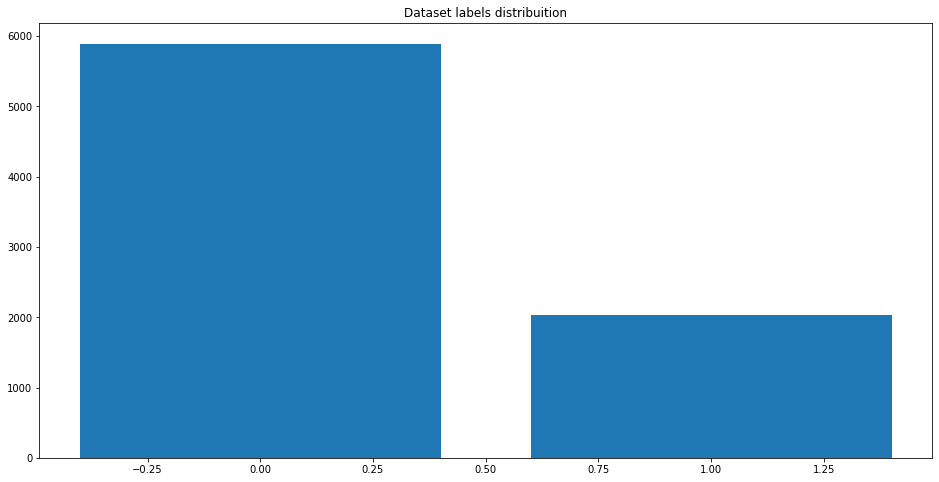

In [ ]:
from collections import Counter

target_cnt = Counter(train_data.label)
print(target_cnt)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

# Word_tokenize

In [ ]:
import nltk
nltk.download('punkt')

text = train_data.loc[0,'tweet']
print(word_tokenize(text))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


NameError: ignored

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [ ]:
# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

In [ ]:
# KERAS
SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024

# SENTIMENT
POSITIVE = 0
NEGATIVE = 1
SENTIMENT_THRESHOLDS = (0.4, 0.7)

# EXPORT
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

In [ ]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [ ]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [ ]:
%%time
df.tweet = df.tweet.apply(lambda x: preprocess(x))

CPU times: user 812 ms, sys: 6.58 ms, total: 819 ms
Wall time: 1.4 s


In [ ]:
df

,id,label,tweet
0,1,0.0,fingerprint pregnancy test android apps beauti...
1,2,0.0,finally transparant silicon case thanks uncle ...
2,3,0.0,love would go talk makememories unplug relax i...
3,4,0.0,wired know george made way iphone cute daventr...
4,5,1.0,amazing service apple even talk question unles...
...,...,...,...
1948,9869,NaN,samsunggalaxynote7 explodes burns 6 year old t...
1949,9870,NaN,available hoodie check iphone case music discount
1950,9871,NaN,goes crack right across screen could actually ...
1951,9872,NaN,said adobe big time may well include apple


In [ ]:
df_train = df[:7920]

In [ ]:
df_train.tail()

,id,label,tweet
7915,7916,0.0,live loud lol liveoutloud selfie smile sony mu...
7916,7917,0.0,would like wish amazing day make every minute ...
7917,7918,0.0,helping lovely 90 year old neighbor ipad morni...
7918,7919,0.0,finally got smart pocket wifi stay connected a...
7919,7920,0.0,apple barcelona apple store bcn barcelona trav...


In [ ]:
df_test = df[7920:]

In [ ]:
df_test.head()

NameError: ignored

In [ ]:
%%time
documents = [_text.split() for _text in df_train.tweet]

CPU times: user 9.95 ms, sys: 6.11 ms, total: 16.1 ms
Wall time: 18 ms


In [ ]:
w2v_model = gensim.models.word2vec.Word2Vec(size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)

In [ ]:
w2v_model.build_vocab(documents)

In [ ]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 1332


In [ ]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

CPU times: user 6.07 s, sys: 117 ms, total: 6.18 s
Wall time: 5.07 s


(1711261, 3085728)

In [ ]:
w2v_model.wv.most_similar("apple")

[('tim', 0.5313926339149475),
 ('mac', 0.5076044797897339),
 ('crappy', 0.4772760272026062),
 ('easy', 0.468940794467926),
 ('suck', 0.4662647843360901),
 ('pro', 0.4550595283508301),
 ('macbook', 0.45021897554397583),
 ('air', 0.4415220022201538),
 ('crash', 0.44076794385910034),
 ('computer', 0.42277002334594727)]

In [ ]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.tweet)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 17768
CPU times: user 232 ms, sys: 41.6 ms, total: 274 ms
Wall time: 296 ms


In [ ]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.tweet), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.tweet), maxlen=SEQUENCE_LENGTH)

CPU times: user 275 ms, sys: 588 µs, total: 276 ms
Wall time: 282 ms


In [ ]:
labels = df_train.label.unique().tolist()
labels

[0.0, 1.0]

In [ ]:
df_test.label = df_test.label.fillna(0)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
encoder = LabelEncoder()
encoder.fit(df_train.label.tolist())

y_train = encoder.transform(df_train.label.tolist())
y_test = encoder.transform(df_test.label.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (7920, 1)
y_test (1953, 1)


In [ ]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (7920, 300)
y_train (7920, 1)

x_test (1953, 300)
y_test (1953, 1)


In [ ]:
y_train[:10]

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]])

# Embedding layer

In [ ]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(17768, 300)


In [ ]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

NameError: ignored

# Build Model

In [ ]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 64)            64000     
                                                                 
 dropout_1 (Dropout)         (None, 10, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               66000     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 130,101
Trainable params: 130,101
Non-trainable params: 0
_________________________________________________________________


# Compile model

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

# Callbacks

In [ ]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

# Train

In [ ]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/8
7/7 [==============================] - 16s 1s/step - loss: 0.5673 - accuracy: 0.6964 - val_loss: 0.3598 - val_accuracy: 0.8434 - lr: 0.0010
Epoch 2/8
7/7 [==============================] - 8s 1s/step - loss: 0.3238 - accuracy: 0.8566 - val_loss: 0.2955 - val_accuracy: 0.8649 - lr: 0.0010
Epoch 3/8
7/7 [==============================] - 9s 1s/step - loss: 0.2846 - accuracy: 0.8767 - val_loss: 0.3122 - val_accuracy: 0.8737 - lr: 0.0010
Epoch 4/8
7/7 [==============================] - 10s 1s/step - loss: 0.2871 - accuracy: 0.8782 - val_loss: 0.2958 - val_accuracy: 0.8801 - lr: 0.0010
Epoch 5/8
7/7 [==============================] - 11s 2s/step - loss: 0.2751 - accuracy: 0.8809 - val_loss: 0.2812 - val_accuracy: 0.8788 - lr: 0.0010
Epoch 6/8
7/7 [==============================] - 12s 2s/step - loss: 0.2713 - accuracy: 0.8831 - val_loss: 0.2745 - val_accuracy: 0.8801 - lr: 0.0010
Epoch 7/8
7/7 [==============================] - 10s 1s/step - loss: 0.2664 - accuracy: 0.8798 - val_l

# Evaluate

In [ ]:
%%time
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

2/2 [==============================] - 0s 142ms/step - loss: 0.5002 - accuracy: 0.7143

ACCURACY: 0.7142857313156128
LOSS: 0.5002393126487732
CPU times: user 308 ms, sys: 57.2 ms, total: 366 ms
Wall time: 396 ms


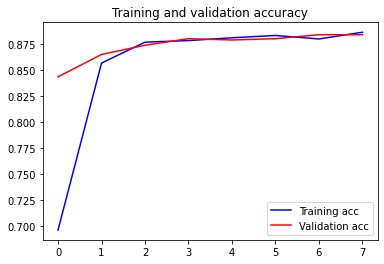

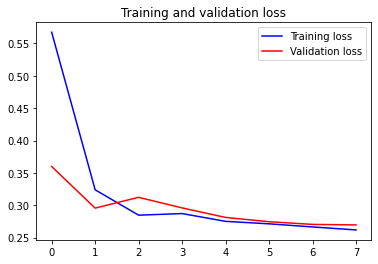

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

# Predict

In [ ]:
def decode_sentiment(score):
  return POSITIVE if score < 0.5 else NEGATIVE

In [ ]:
def predict(text):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}

In [ ]:
predict("I love iphone")

{'elapsed_time': 0.12656402587890625, 'label': 0, 'score': 0.07552565634250641}

In [ ]:
predict("I hate apple")

{'elapsed_time': 0.1208796501159668, 'label': 1, 'score': 0.6995238065719604}

# Confusion Matrix

In [ ]:
%%time
y_pred_1d = []
y_test_1d = list(df_test.label)
scores = model.predict(x_test, verbose=1, batch_size=8000)
y_pred_1d = [decode_sentiment(score) for score in scores]

1/1 [==============================] - 0s 418ms/step
CPU times: user 389 ms, sys: 79.8 ms, total: 468 ms
Wall time: 537 ms


In [ ]:
submission = pd.read_csv((DATA_IN_PATH + 'sample_submission.csv'))

In [ ]:
submission.label = y_pred_1d

In [ ]:
submission.to_csv((DATA_IN_PATH + 'submission.csv'), index=False)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


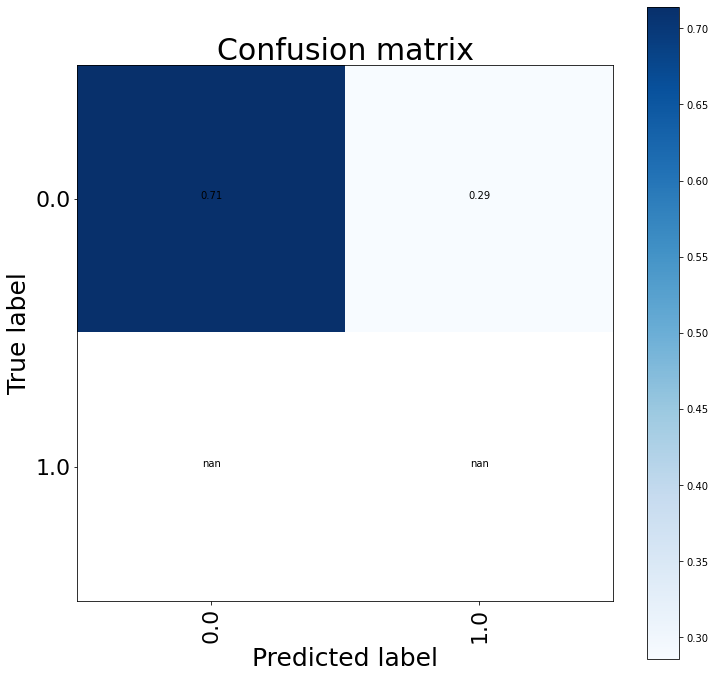

CPU times: user 338 ms, sys: 8.2 ms, total: 346 ms
Wall time: 357 ms


In [ ]:
%%time

cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=df_train.label.unique(), title="Confusion matrix")
plt.show()

In [ ]:
print(classification_report(y_test_1d, y_pred_1d))

              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83      1953
         1.0       0.00      0.00      0.00         0

    accuracy                           0.71      1953
   macro avg       0.50      0.36      0.42      1953
weighted avg       1.00      0.71      0.83      1953



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy_score(y_test_1d, y_pred_1d)

0.7142857142857143

In [ ]:
model.save(KERAS_MODEL)
w2v_model.save(WORD2VEC_MODEL)
pickle.dump(tokenizer, open(TOKENIZER_MODEL, "wb"), protocol=0)
pickle.dump(encoder, open(ENCODER_MODEL, "wb"), protocol=0)

In [ ]:
df_test

,id,label,tweet
0,7921,0.0,hate new iphone upgrade let download apps ugh ...
1,7922,0.0,currently shitting fucking pants apple imac ca...
2,7923,0.0,like puts cd roms ipad possible yes block screen
3,7924,0.0,ipod officially dead lost pictures videos 1d 5...
4,7925,0.0,fighting itunes night want music paid
...,...,...,...
1948,9869,0.0,samsunggalaxynote7 explodes burns 6 year old t...
1949,9870,0.0,available hoodie check iphone case music discount
1950,9871,0.0,goes crack right across screen could actually ...
1951,9872,0.0,said adobe big time may well include apple


In [ ]:
scores

array([[0.8578729 ],
       [0.79595226],
       [0.5823799 ],
       ...,
       [0.82808316],
       [0.7765679 ],
       [0.00888795]], dtype=float32)